In [23]:
import torch

In [24]:
torch.linspace(0, 10, steps=5)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [25]:
import numpy as np

In [26]:
1/np.sqrt(3)

0.5773502691896258

In [27]:
a=[2,3]
a.pop()

3

In [28]:
a.pop()

2

In [29]:
a

[]

In [30]:
if not a:
    print('empty')

empty


In [31]:
import torch

def look_at(eye, center, up):
    f = (center - eye)
    f = f / torch.norm(f)
    
    u = up / torch.norm(up)
    
    s = torch.cross(f, u)
    s = s / torch.norm(s)
    
    u = torch.cross(s, f)
    
    result = torch.eye(4)
    result[0, :3] = s
    result[1, :3] = u
    result[2, :3] = -f
    result[:3, 3] = -torch.matmul(result[:3, :3], eye)
    
    return result

eye = torch.tensor([0, 0, 0], dtype=torch.float32)
center = torch.tensor([-1.0, 0.0, 0.0], dtype=torch.float32)
up = torch.tensor([0.0, -1.0, 0.0], dtype=torch.float32)

look_at_matrix = look_at(eye, center, up)
print(look_at_matrix)
print("look_at_matrix transpose", look_at_matrix.t())

tensor([[ 0.,  0.,  1., -0.],
        [ 0., -1.,  0., -0.],
        [ 1., -0., -0., -0.],
        [ 0.,  0.,  0.,  1.]])
look_at_matrix transpose tensor([[ 0.,  0.,  1.,  0.],
        [ 0., -1., -0.,  0.],
        [ 1.,  0., -0.,  0.],
        [-0., -0., -0.,  1.]])


In [32]:
import torch

In [33]:
torch.arange(0, 10, 2)

tensor([0, 2, 4, 6, 8])

In [34]:
# 示例代码演示torch.norm函数的使用

# 计算eye向量的范数
eye_norm = torch.norm(eye)
print(f"eye向量的范数: {eye_norm}")

# 计算center向量的范数
center_norm = torch.norm(center)
print(f"center向量的范数: {center_norm}")

# 计算up向量的范数
up_norm = torch.norm(up)
print(f"up向量的范数: {up_norm}")



eye向量的范数: 0.0
center向量的范数: 1.0
up向量的范数: 1.0


In [35]:
import numpy as np
import torch

# 创建一个numpy数组
np_array = np.array([3.0, 4.0, 5.0])
torch_tensor = torch.tensor(np_array)
torch.norm(torch_tensor)

# 从numpy数组构建torch tensor
torch_tensor = torch.from_numpy(np_array)
torch.norm(torch_tensor)



tensor(7.0711, dtype=torch.float64)

## hdr文件处理和解析

/tmp/ipykernel_3003573/3641923448.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  hdr_image = imageio.imread('datasets/TensoIR/Environment_Maps/high_res_envmaps_2k/bridge.hdr')


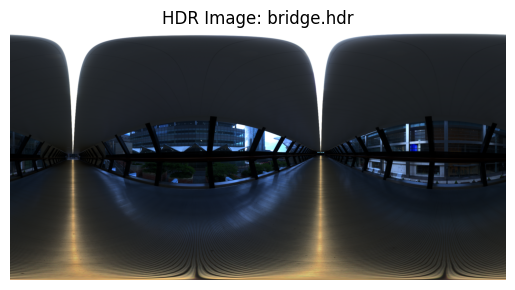

In [36]:
import imageio
import matplotlib.pyplot as plt

# 读取 HDR 文件
hdr_image = imageio.imread('datasets/TensoIR/Environment_Maps/high_res_envmaps_2k/bridge.hdr')

# 显示图像
plt.imshow(hdr_image)
plt.axis('off')  # 不显示坐标轴
plt.title('HDR Image: bridge.hdr')
plt.show()


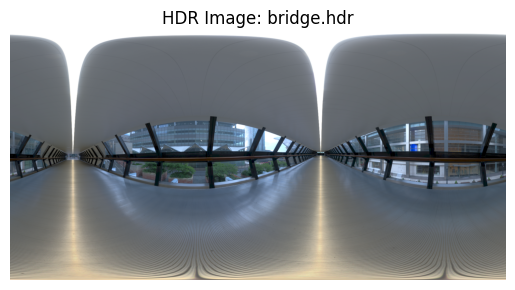

In [37]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

# 将 HDR 图像的范围从 0-255 变为 0-1
hdr_image_normalized = hdr_image / 255.0

# 进行 gamma 矫正
gamma = 2.2
hdr_image_corrected = np.power(hdr_image_normalized, 1.0 / gamma)

# 显示图像
plt.imshow(hdr_image_corrected)
plt.axis('off')  # 不显示坐标轴
plt.title('HDR Image: bridge.hdr')
plt.show()

In [38]:
hdr_image.shape

(1024, 2048, 3)

In [39]:
hdr_image_corrected.max()

1.0

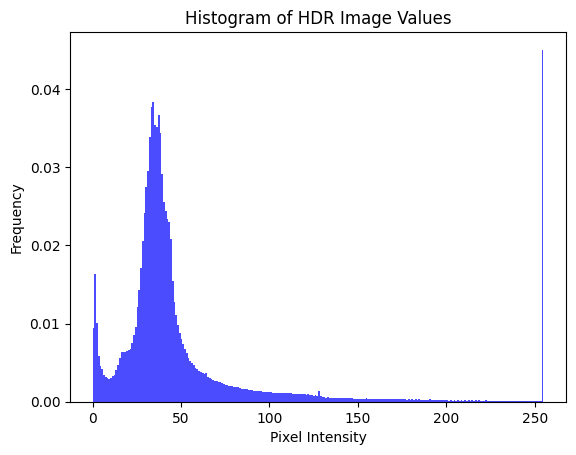

In [40]:
import matplotlib.pyplot as plt

# 展平图像数组
hdr_image_flat = hdr_image.flatten()

# 绘制直方图
plt.hist(hdr_image_flat, bins=256, range=(0, 255), density=True, color='blue', alpha=0.7)
plt.title('Histogram of HDR Image Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [41]:
torch.rand(4,4)

tensor([[0.6069, 0.0882, 0.5615, 0.7761],
        [0.1297, 0.9581, 0.8855, 0.0539],
        [0.9968, 0.7632, 0.0992, 0.3874],
        [0.1292, 0.8560, 0.4503, 0.2115]])

In [42]:
from PIL import Image

# 定义cubemap图片的文件名
cubemap_filenames = [f'cubemap_{i}.png' for i in range(6)]

# 打开所有cubemap图片
cubemap_images = [Image.open(filename) for filename in cubemap_filenames]

# 获取单张cubemap图片的尺寸
width, height = cubemap_images[0].size

# 创建一个新的图像来合成cubemap
cubemap_combined = Image.new('RGB', (width * 4, height * 3))

# 将六张cubemap图片粘贴到合成图像的正确位置
# 这里假设cubemap图片的顺序为：右、左、上、下、前、后
positions = [(2 * width, height), (0, height), (width, 0), (width, 2 * height), (width, height), (3 * width, height)]
for img, pos in zip(cubemap_images, positions):
    cubemap_combined.paste(img, pos)

# 保存合成后的cubemap图片
cubemap_combined.save('cubemap_combined.png')
# cubemap_combined.show()

In [43]:
torch.rand(3)

tensor([0.7026, 0.7207, 0.5507])

In [44]:

from PIL import Image
import os

path="/home/jiahao/GS-IR/datasets/TensoIR/lego/train_001"
pbr_img_path = os.path.join(path, "pbr_bridge.png")
gt_img_path=os.path.join(path, "rgba_bridge.png")
# 读取图片
pbr_image = Image.open(pbr_img_path)
gt_image = Image.open(gt_img_path)

#将对应的image转化为np.array
pbr_image_np = np.array(pbr_image)
gt_image_np = np.array(gt_image)

pbr_image_tensor=torch.from_numpy(pbr_image_np)
gt_image_tensor=torch.from_numpy(gt_image_np)

print("pbr image shape:",pbr_image_np.shape)
print("gt image shape:",gt_image_np.shape)

pbr image shape: (800, 800, 3)
gt image shape: (800, 800, 4)


In [45]:
gt_image_np.max()

255

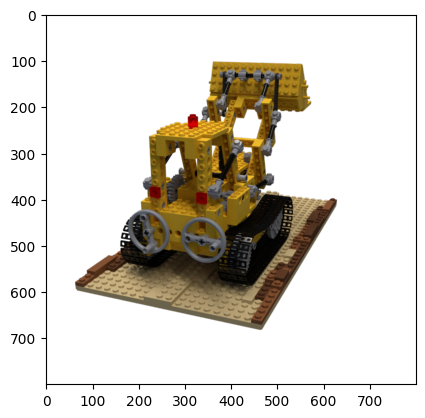

In [46]:
#显示gt_image_tensor
plt.imshow(gt_image_tensor)

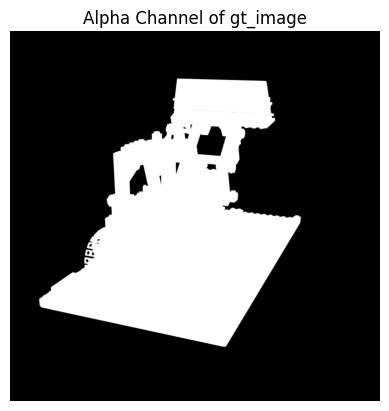

In [47]:
# 提取alpha通道
alpha_channel = gt_image_np[:, :, 3]

# 可视化alpha通道
plt.imshow(alpha_channel, cmap='gray')
plt.axis('off')  # 不显示坐标轴
plt.title('Alpha Channel of gt_image')
plt.show()


In [48]:
background=np.array([0,0,0], dtype=np.float32)
# background[:,None,None].shape
gt_image_rgb=gt_image_np[:,:,:3]
#对gt_image_rgb进行归一化
gt_image_rgb = (gt_image_rgb / 255.0).clip(0.0, 1.0)
alpha_channel=alpha_channel/255.0
gt_image_final=gt_image_rgb*alpha_channel+background*(1-alpha_channel)
#对gt_image_final进行归一化
# gt_image_final = (gt_image_final / 255.0).clip(0.0, 1.0)
#可视化合成后的图像
plt.imshow(gt_image_final)
plt.axis('off')  # 不显示坐标轴
plt.title('Final Image')
plt.show()

ValueError: operands could not be broadcast together with shapes (800,800,3) (800,800) 

In [2]:
pbr_image

NameError: name 'pbr_image' is not defined

In [76]:
gt_image_final.shape

(800, 800, 3)

In [70]:
gt_image_final.shape

(800, 800, 3)